# Part 2: Scrape and Analyze Mars Weather Data

In [1]:
from bs4 import BeautifulSoup

In [2]:
from splinter import Browser
from selenium.webdriver.chrome.service import Service

my_service = Service()
browser = Browser('chrome', service=my_service)

In [3]:
# Visit the website with the Mars Weather Data
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

In [4]:
browser.visit(url)

In [5]:
html = browser.html

In [6]:
soup = BeautifulSoup(html, 'html.parser')

In [7]:
headers = soup.find_all("th")
headers = [header.text for header in headers]
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
rows = soup.find_all("tr", class_ = "data-row")

In [9]:
# create an empty list for all the rows
all_rows = []
# loop over the rows
for row in rows:
    # find the td elements and extract the text
    tds = row.find_all("td")
    # put the td text into a row list
    single_row = [td.text for td in tds]
    all_rows.append(single_row)
    print(single_row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Assemble the scraped data into a Pandas DataFrame
pd.read_html(url)[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
temperature_df = pd.DataFrame(all_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
temperature_df   

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
#Checking datatypes of dataframe
dataframe_Type = temperature_df.dtypes
dataframe_Type

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
#Convert datatypes
convert_dict = {'id': int,
                'sol': int,
                'ls': int,
                'month': int,
                'min_temp': float,
                'pressure': float
                }
 
temperature_df = temperature_df.astype(convert_dict)
temperature_df["terrestrial_date"] = pd.to_datetime(temperature_df["terrestrial_date"])
print(temperature_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [15]:
temperature_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
# Analyze the dataset with Pandas functions

In [17]:
# How many months exist on Mars?

months = temperature_df['month'].nunique()

In [18]:
months

12

In [19]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?

martian_days = temperature_df['sol'].nunique()

In [20]:
martian_days

1867

In [21]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

# Find the average minimum daily temperature for all of the months 
temperature_df_groupby_month = temperature_df.groupby('month').mean()
temperature_df_avg_mintemp = temperature_df_groupby_month['min_temp'].reset_index('month')
temperature_df_avg_mintemp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


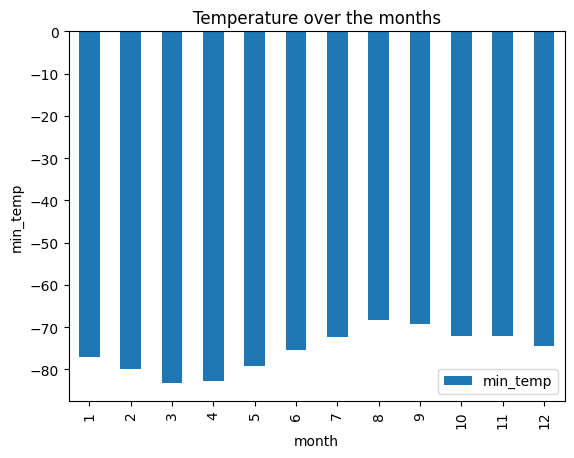

In [22]:
# Plot the results as a bar chart

temperature_df_avg_mintemp.plot(x='month',y='min_temp', kind = 'bar')
plt.ylabel('min_temp')
plt.title('Temperature over the months')
plt.show()

In [23]:
# coldest months

min_temp_mars = temperature_df_avg_mintemp['min_temp'].min()
coldest_month = temperature_df_avg_mintemp.loc[temperature_df_avg_mintemp['min_temp'] == min_temp_mars, 'month'].iloc[0]
coldest_month

3

In [24]:
# warmest months


max_temp_mars = temperature_df_avg_mintemp['min_temp'].max()
warmest_month = temperature_df_avg_mintemp.loc[temperature_df_avg_mintemp['min_temp'] == max_temp_mars, 'month'].iloc[0]
warmest_month

8

In [25]:
# Which months have the lowest and the highest atmospheric pressure on Mars?

pressure_groupby_month = temperature_df.groupby('month').mean()
pressure_avg_month = pressure_groupby_month['pressure'].reset_index('month')
pressure_avg_month

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


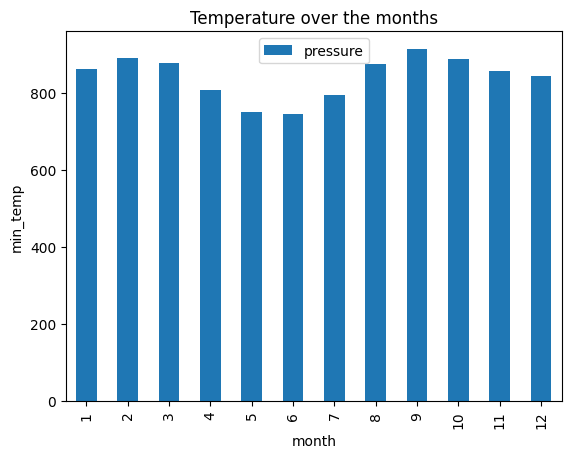

In [26]:
# Plot the results as a bar chart

pressure_avg_month.plot(x='month',y='pressure', kind = 'bar')
plt.ylabel('min_temp')
plt.title('Temperature over the months')
plt.show()

In [27]:
# lowest pressure

min_press_mars = pressure_avg_month['pressure'].min()
min_press_month = pressure_avg_month.loc[pressure_avg_month['pressure'] == min_press_mars, 'month'].iloc[0]
min_press_month

6

In [28]:
# highest pressure

max_press_mars = pressure_avg_month['pressure'].max()
max_press_month = pressure_avg_month.loc[pressure_avg_month['pressure'] == max_press_mars, 'month'].iloc[0]
max_press_month

9

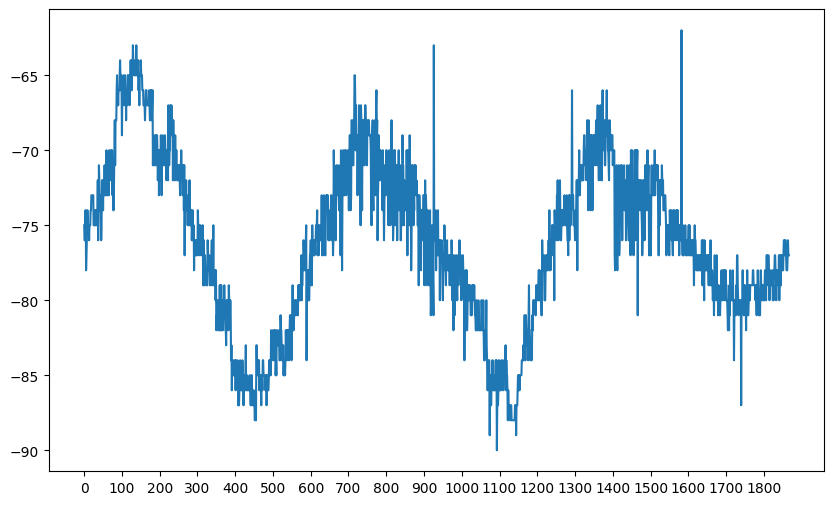

In [29]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# Visually estimate the result by plotting the daily minimum temperature.

plt.figure(figsize=(10,6))
temperature_df['min_temp'].plot(x='month',y='min_temp')
plt.xticks(np.arange(0, len(temperature_df), 100))
#plt.figure(figsize=(100,60))
plt.show()

In [30]:
# On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest.

# Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

In [31]:
# Writing the DataFrame to a CSV file

temperature_df.to_csv('Mission to mars.csv', encoding='utf-8')

In [32]:
browser.quit()